In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import catboost
dataset = pd.read_csv('Dataset/creditcard.csv')

In [2]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(dataset['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


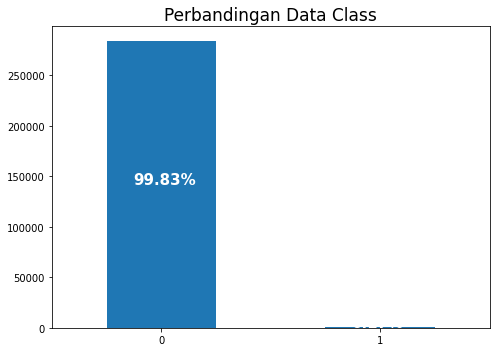

In [4]:
# Plot dengan presentase
fig, ax = plt.subplots(figsize=(7,5))
name = ['0', '1']
ax = dataset['Class'].value_counts().plot(kind='bar')
ax.set_title('Perbandingan Data Class', fontsize = 17)
ax.set_xticklabels (name, rotation = 0)

# menghitung presentase
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:  
  ax.text(i.get_x()+0.12, i.get_height()-i.get_height()/2, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
          color='white', weight = 'bold')    
plt.tight_layout()

In [5]:
# Convert type kolom numerik
col_num=[]
col_cat=[]
col = dataset.columns[:dataset.shape[1]-1]
for i in dataset.columns:
  if dataset[i].nunique() > 12:        
    dataset[i] = pd.to_numeric(dataset[i])
    col_num.append(i)
  else:
    col_cat.append(i)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

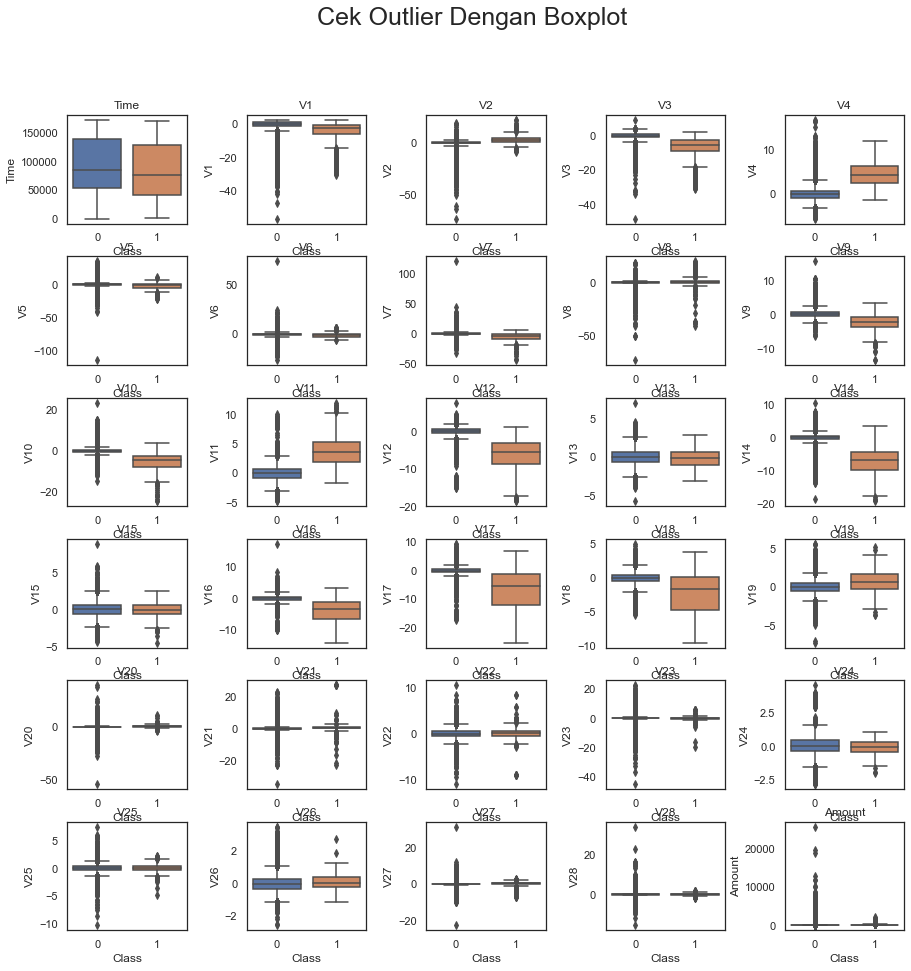

In [6]:
sns.set(style='white')
plt.rcParams['figure.figsize'] = (15, 15)
plt.suptitle('Cek Outlier Dengan Boxplot',fontsize=25)
plt.subplots_adjust(wspace = 0.5, hspace=0.3)

for i in range(len(col_num)):
  plt.subplot(6,5,i+1)
  plt.title(col_num[i])  
  sns.boxplot(x='Class', y=col_num[i],data=dataset)

In [7]:
# cek jumlah outlier untuk tiap atribut numerik

print('Jumlah Outlier Awal')
for i in col_num:
  Q1 = dataset[i].quantile(0.25)
  Q3 = dataset[i].quantile(0.75)
  IQR = Q3 - Q1
  otl = abs(dataset[dataset[i] < (Q1 - 1.5 * IQR)].shape[0])+abs(dataset[dataset[i]>(Q3 + 1.5 * IQR)].shape[0])    
  print(i, ': %1d outlier data (%.2f'%(otl, otl/dataset.shape[0]*100)+'%)')

Jumlah Outlier Awal
Time : 0 outlier data (0.00%)
V1 : 7062 outlier data (2.48%)
V2 : 13526 outlier data (4.75%)
V3 : 3363 outlier data (1.18%)
V4 : 11148 outlier data (3.91%)
V5 : 12295 outlier data (4.32%)
V6 : 22965 outlier data (8.06%)
V7 : 8948 outlier data (3.14%)
V8 : 24134 outlier data (8.47%)
V9 : 8283 outlier data (2.91%)
V10 : 9496 outlier data (3.33%)
V11 : 780 outlier data (0.27%)
V12 : 15348 outlier data (5.39%)
V13 : 3368 outlier data (1.18%)
V14 : 14149 outlier data (4.97%)
V15 : 2894 outlier data (1.02%)
V16 : 8184 outlier data (2.87%)
V17 : 7420 outlier data (2.61%)
V18 : 7533 outlier data (2.64%)
V19 : 10205 outlier data (3.58%)
V20 : 27770 outlier data (9.75%)
V21 : 14497 outlier data (5.09%)
V22 : 1317 outlier data (0.46%)
V23 : 18541 outlier data (6.51%)
V24 : 4774 outlier data (1.68%)
V25 : 5367 outlier data (1.88%)
V26 : 5596 outlier data (1.96%)
V27 : 39163 outlier data (13.75%)
V28 : 30342 outlier data (10.65%)
Amount : 31904 outlier data (11.20%)


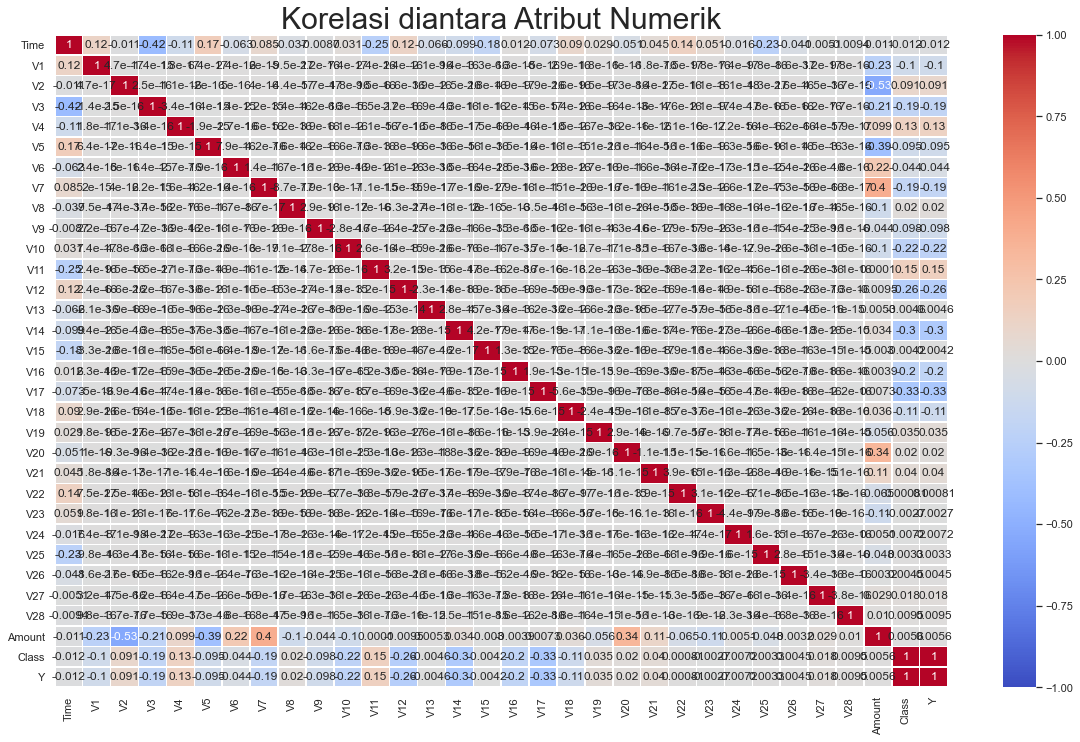

In [8]:
# Convert Y to numerik
dataset['Y'] = pd.to_numeric(dataset['Class'])

# Plot korelasi
sns.set(style='white')
plt.rcParams['figure.figsize'] = (20,12)
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Korelasi diantara Atribut Numerik', fontsize = 30)
plt.show()

In [9]:
X=dataset.drop('Class', axis=1)
y=dataset['Class']

In [10]:
X = X.reindex(X['Time']).drop('Time', axis=1)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=550,
                          random_state=123)
clf = clf.fit(X, y)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

(284807, 22)

In [12]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [13]:
# Print the feature ranking
print("Feature ranking")

for f in range(X_new.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking
1. feature 12 (0.040328)
2. feature 11 (0.038452)
3. feature 26 (0.036515)
4. feature 23 (0.036224)
5. feature 28 (0.036138)
6. feature 10 (0.036106)
7. feature 14 (0.035625)
8. feature 17 (0.034813)
9. feature 19 (0.034799)
10. feature 13 (0.034799)
11. feature 16 (0.034766)
12. feature 24 (0.034434)
13. feature 5 (0.034298)
14. feature 18 (0.034173)
15. feature 27 (0.034155)
16. feature 21 (0.034006)
17. feature 25 (0.033716)
18. feature 15 (0.033637)
19. feature 8 (0.033615)
20. feature 2 (0.033581)
21. feature 4 (0.033545)
22. feature 6 (0.033357)


In [14]:
X_baru=pd.DataFrame({'V3': X_new[:, 0], 'V11': X_new[:, 1], 'V12':X_new[:, 2], 'V13':X_new[:, 3], 'V14':X_new[:, 4], 'V15':X_new[:, 5], 'V17':X_new[:, 6], 'V18':X_new[:, 7], 'V20':X_new[:, 8], 'V24':X_new[:, 9], 'V25':X_new[:, 10], 'V27':X_new[:, 11], 'V29':X_new[:, 12]})
X_baru

,V3,V11,V12,V13,V14,V15,V17,V18,V20,V24,V25,V27,V29
0,2.536347,-0.338321,0.462388,0.239599,0.363787,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791
1,2.536347,-0.338321,0.462388,0.239599,0.363787,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791
2,0.166480,0.060018,-0.082361,-0.078803,-0.255425,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361
3,0.166480,0.060018,-0.082361,-0.078803,-0.255425,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361
4,1.773209,-0.503198,1.800499,0.791461,-1.514654,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-1.061821,-0.101793,-1.198477,0.247664,0.438373,-0.619209,0.796839,0.731841,0.146199,-0.032165,-0.137347,-0.322553,-0.951675
284803,-3.745369,-1.132966,-1.256353,-1.752420,-1.792343,4.176098,-4.619010,0.742690,-7.636963,-0.197888,-4.140396,-7.604715,-1.524505
284804,-1.556818,-0.751560,-0.588213,0.865752,0.494447,-0.947307,0.571489,0.669811,0.201420,0.111953,-0.084736,-0.509592,0.246825
284805,-1.556818,-0.751560,-0.588213,0.865752,0.494447,-0.947307,0.571489,0.669811,0.201420,0.111953,-0.084736,-0.509592,0.246825


In [15]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
import imblearn
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# oversample = SMOTETomek(random_state=42)
# X_new, y_new = oversample.fit_resample(X_baru, y)


X_train, X_test, y_train, y_test = train_test_split(X_baru, y, test_size=0.20)
# Handle imbalanced data

# Run besok
oversample = SMOTETomek(random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# df_y_train.coulmns=["Class"]

# X_train, X_test, y_train, y_test = train_test_split(x_train_over, y_train_over, test_size=0.20)

# Default
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
df_y_train = pd.DataFrame({'Class': y_train[:]})
df_y_train["Class"].value_counts()

1    227458
0    227458
Name: Class, dtype: int64

In [19]:
y_test = pd.DataFrame({'Class': y_test[:]})
y_test["Class"].value_counts()

0    56853
1      109
Name: Class, dtype: int64

In [20]:
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (454916, 13)
X_test :  (56962, 13)
y_train :  (454916,)
y_test :  (56962, 1)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = model_1.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56064   789]
 [  102     7]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56853
           1       0.01      0.06      0.02       109

    accuracy                           0.98     56962
   macro avg       0.50      0.53      0.50     56962
weighted avg       1.00      0.98      0.99     56962



In [24]:
m_name = []
conf_mat = []
acc = []
pres = []
rec = []
f1 = []

In [25]:
from sklearn import metrics
m_name.append('KNN')
acc.append(metrics.accuracy_score(y_test, y_pred))
pres.append(metrics.precision_score(y_test, y_pred))
rec.append(metrics.recall_score(y_test, y_pred))
f1.append(metrics.f1_score(y_test, y_pred))
print('Akurasi:', metrics.accuracy_score(y_test, y_pred))
print('Presisi:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('F1-Score', metrics.f1_score(y_test, y_pred))

Akurasi: 0.9843579930479969
Presisi: 0.008793969849246231
Recall: 0.06422018348623854
F1-Score 0.015469613259668509


In [26]:
from sklearn.metrics import roc_auc_score
model_2 = LogisticRegression()
param_grid={'penalty':['l1','l2'],'C':(np.logspace(-4,4,20)),'solver': ['liblinear']}
gcsv = GridSearchCV(model_2, param_grid=param_grid, scoring='roc_auc',cv=5)
# rscv_2=RandomizedSearchCV(model_2, param_grid_2, n_iter=20, scoring='roc_auc', cv=5)
gcsv.fit(X_train,y_train)
y_pred_2 = gcsv.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[31993 24860]
 [   60    49]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.72     56853
           1       0.00      0.45      0.00       109

    accuracy                           0.56     56962
   macro avg       0.50      0.51      0.36     56962
weighted avg       1.00      0.56      0.72     56962



In [28]:
m_name.append('Logistic Regression')
acc.append(metrics.accuracy_score(y_test, y_pred_2))
pres.append(metrics.precision_score(y_test, y_pred_2))
rec.append(metrics.recall_score(y_test, y_pred_2))
f1.append(metrics.f1_score(y_test, y_pred_2))
print('Akurasi:', metrics.accuracy_score(y_test, y_pred_2))
print('Presisi:', metrics.precision_score(y_test, y_pred_2))
print('Recall:', metrics.recall_score(y_test, y_pred_2))
print('F1-Score', metrics.f1_score(y_test, y_pred_2))

Akurasi: 0.5625153611179383
Presisi: 0.001967160464089285
Recall: 0.44954128440366975
F1-Score 0.003917179630665921


In [29]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier()
model_3.fit(X_train,y_train)
y_pred_3 = model_3.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred_3))
print(classification_report(y_test, y_pred_3))

[[56740   113]
 [  104     5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.04      0.05      0.04       109

    accuracy                           1.00     56962
   macro avg       0.52      0.52      0.52     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
m_name.append('Random Forest')
acc.append(metrics.accuracy_score(y_test, y_pred_3))
pres.append(metrics.precision_score(y_test, y_pred_3))
rec.append(metrics.recall_score(y_test, y_pred_3))
f1.append(metrics.f1_score(y_test, y_pred_3))
print('Akurasi:', metrics.accuracy_score(y_test, y_pred_3))
print('Presisi:', metrics.precision_score(y_test, y_pred_3))
print('Recall:', metrics.recall_score(y_test, y_pred_3))
print('F1-Score', metrics.f1_score(y_test, y_pred_3))

Akurasi: 0.9961904427513079
Presisi: 0.0423728813559322
Recall: 0.045871559633027525
F1-Score 0.04405286343612335


In [32]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid_2={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2'],'n_estimators':np.arange(10,100),'max_depth':np.arange(2,12)}
# rscv = RandomizedSearchCV(model_3, param_grid_2, n_iter=5, scoring='roc_auc', cv=5)
# rscv.fit(X_train,y_train)
# y_pred_4 = rscv.predict(X_test)

In [33]:
# print(confusion_matrix(y_test, y_pred_4))
# print(classification_report(y_test, y_pred_4))

In [34]:
# print(metrics.precision_score(y_test, y_pred_4))
# print(metrics.f1_score(y_test, y_pred_4))
# print(metrics.accuracy_score(y_test, y_pred_4))
# print(metrics.precision_score(y_test, y_pred_4))

In [35]:
from catboost import CatBoostClassifier
import ipywidgets

model5 = CatBoostClassifier(
    random_seed=42,    
    verbose = 100
)

model5.fit(
    X_train, y_train,    
    eval_set=(X_test, y_test),
    use_best_model=True,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.143687
0:	learn: 0.6791842	test: 0.6759713	best: 0.6759713 (0)	total: 179ms	remaining: 2m 58s
100:	learn: 0.3485505	test: 0.3712377	best: 0.3712377 (100)	total: 12.3s	remaining: 1m 49s
200:	learn: 0.2395751	test: 0.2670496	best: 0.2670496 (200)	total: 24.4s	remaining: 1m 37s
300:	learn: 0.1782352	test: 0.2057372	best: 0.2057372 (300)	total: 36.6s	remaining: 1m 25s
400:	learn: 0.1410862	test: 0.1693176	best: 0.1693176 (400)	total: 48.9s	remaining: 1m 13s
500:	learn: 0.1155785	test: 0.1440424	best: 0.1440424 (500)	total: 1m 1s	remaining: 1m 1s
600:	learn: 0.0967706	test: 0.1250748	best: 0.1250748 (600)	total: 1m 13s	remaining: 48.9s
700:	learn: 0.0833820	test: 0.1119689	best: 0.1119689 (700)	total: 1m 25s	remaining: 36.7s
800:	learn: 0.0724957	test: 0.1014301	best: 0.1014301 (800)	total: 1m 38s	remaining: 24.5s
900:	learn: 0.0636460	test: 0.0926095	best: 0.0926095 (900)	total: 1m 50s	remaining: 12.2s
999:	learn: 0.0569533	test: 0.0860044	best: 0.0860044 (999)	total

In [36]:
y_pred5 = model5.predict(X_test)

In [37]:
m_name.append('Cat Boost')
acc.append(metrics.accuracy_score(y_test, y_pred5))
pres.append(metrics.precision_score(y_test, y_pred5))
rec.append(metrics.recall_score(y_test, y_pred5))
f1.append(metrics.f1_score(y_test, y_pred5))
print('Akurasi:', metrics.accuracy_score(y_test, y_pred5))
print('Presisi:', metrics.precision_score(y_test, y_pred5))
print('Recall:', metrics.recall_score(y_test, y_pred5))
print('F1-Score', metrics.f1_score(y_test, y_pred5))

Akurasi: 0.9728766546118465
Presisi: 0.005509641873278237
Recall: 0.07339449541284404
F1-Score 0.010249839846252403


In [1]:
mat = metrics.confusion_matrix(y_test, y_pred5)
metrics.confusion_matrix(y_test, y_pred5)

NameError: name 'metrics' is not defined

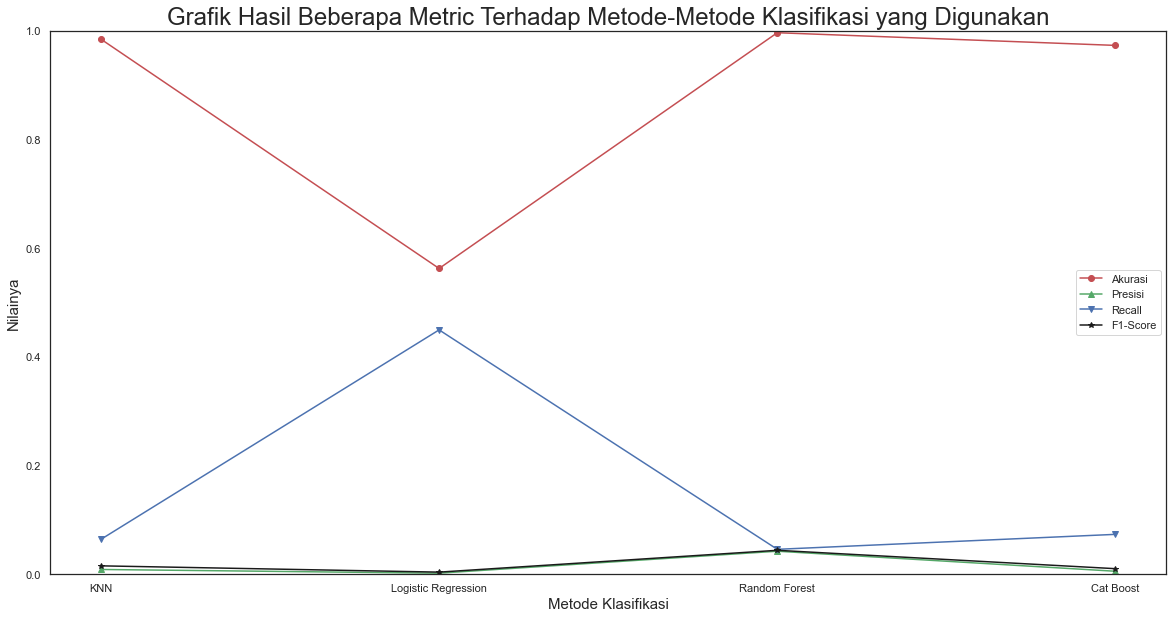

In [39]:
plt.figure(figsize=(20,10))
plt.ylim((0,1))
plt.plot(m_name, acc, 'r', marker='o', label='Akurasi')
plt.plot(m_name, pres, 'g', marker='^', label='Presisi')
plt.plot(m_name, rec, 'b', marker='v', label='Recall')
plt.plot(m_name, f1, 'k', marker='*', label='F1-Score')
plt.xlabel('Metode Klasifikasi', size=15)
plt.ylabel('Nilainya', size=15)
plt.title('Grafik Hasil Beberapa Metric Terhadap Metode-Metode Klasifikasi yang Digunakan', size=24)
plt.legend()